# Video Game Sales Analytics

The following data set has been downloaded from [Kaggle](https://www.kaggle.com/gregorut/videogamesales "Video Game Sales").

The dataset contains a list of video games with sales greater than 100,000 copies.

In [1]:
# Import necessary libraries for loading data and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style

%matplotlib inline
style.use("ggplot")

In [2]:
# Load the data
data = pd.read_csv("vgsales.csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# Information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
# Show the common statistics and calculations in the dataset
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [5]:
# Cast the type of data["Year"] as int64

data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [6]:
# Dropped missing values and turned the years into an integer
data_cleaned = data.dropna(how="any")
data_cleaned.loc[:, "Year"] = data_cleaned["Year"].astype("int64")

data_cleaned.head(10)

/home/jed/.local/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [7]:
# Common statistics for sales
data_cleaned.describe().drop(columns=["Rank", "Year"], index="count")

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
mean,0.265647,0.147731,0.078833,0.048426,0.540910
std,0.822432,0.509303,0.311879,0.190083,1.567345
min,0.000000,0.000000,0.000000,0.000000,0.010000
25%,0.000000,0.000000,0.000000,0.000000,0.060000
50%,0.080000,0.020000,0.000000,0.010000,0.170000
75%,0.240000,0.110000,0.040000,0.040000,0.480000
max,41.490000,29.020000,10.220000,10.570000,82.740000


### Let's start to visualize our data

#### Most sales by platform

In [8]:
sales_by_platform = data_cleaned[["Platform", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].groupby("Platform").sum()
sales_by_platform["sums"] = sales_by_platform.sum(axis=1)
sales_by_platform = sales_by_platform.sort_values("sums", ascending=False)[:15].drop(columns=["sums"])

<AxesSubplot:title={'center':'Sales vs Platform'}, xlabel='Platform', ylabel='Sales (in Millions)'>

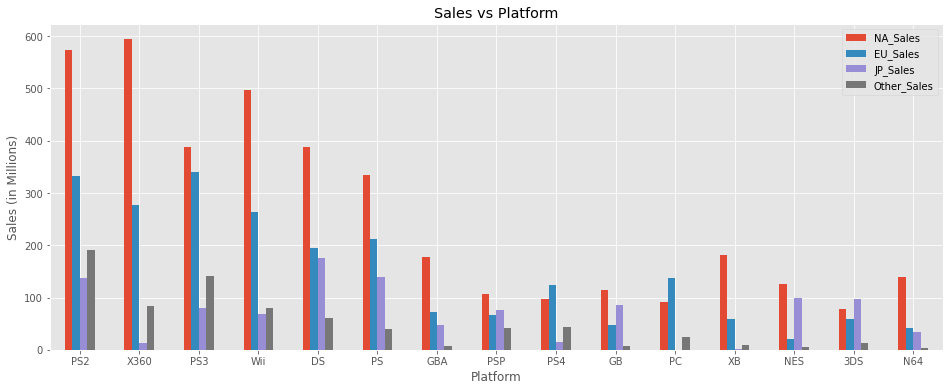

In [9]:
# Plot the data on a bar chart
sales_by_platform.plot.bar(
    title="Sales vs Platform",
    figsize=(16,6),
    ylabel="Sales (in Millions)",
    rot="horizontal"
)

#### Most Sales by Genre

In [10]:
sales_by_genre = data_cleaned[["Genre", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].groupby("Genre").sum()
sales_by_genre["sums"] = sales_by_genre.sum(axis=1)
sales_by_genre = sales_by_genre.sort_values("sums", ascending=False).drop(columns=["sums"])

# Data Frame of Sales by Genre
sales_by_genre

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,861.77,516.48,158.65,184.92
Sports,670.09,371.34,134.76,132.65
Shooter,575.16,310.45,38.18,101.90
Role-Playing,326.50,187.57,350.29,59.38
Platform,445.99,200.65,130.65,51.51
Misc,396.92,211.77,106.67,73.92
Racing,356.93,236.31,56.61,76.68
Fighting,220.74,100.00,87.15,36.19
Simulation,181.78,113.02,63.54,31.36


<AxesSubplot:title={'center':'Sales by Genre'}, xlabel='Genre', ylabel='Sales (in Millions)'>

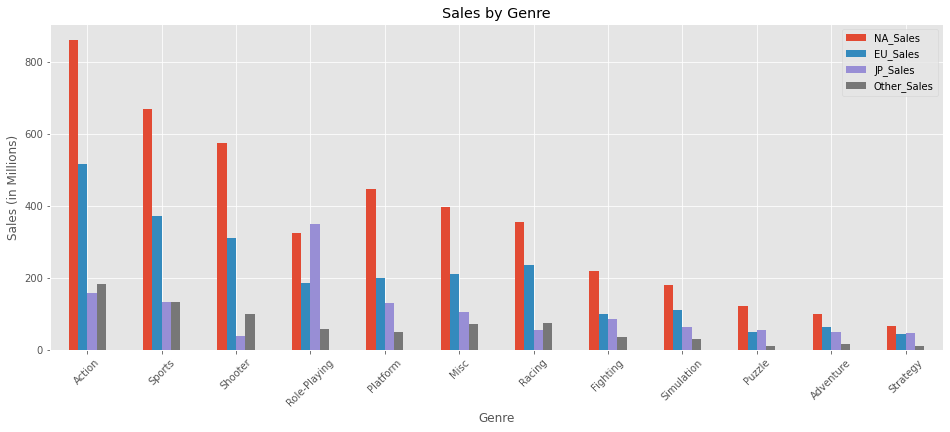

In [11]:
# Plot the sales by genre on a bar graph
sales_by_genre.plot.bar(
    title="Sales by Genre",
    figsize=(16, 6),
    ylabel="Sales (in Millions)",
    rot=45
)

#### Top 10 Games by Sales

In [12]:
top_10_games = data_cleaned[["Name", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].groupby("Name").sum()
top_10_games["sums"] = top_10_games.sum(axis=1)
top_10_games = top_10_games.sort_values("sums", ascending=False)[:10].drop(columns=["sums"])

# Data Frame of Top 10 Games by Sales
top_10_games

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,
Wii Sports,41.49,29.02,3.77,8.46
Grand Theft Auto V,23.46,23.04,1.39,8.03
Super Mario Bros.,32.48,4.88,6.96,0.99
Tetris,26.17,2.95,6.03,0.69
Mario Kart Wii,15.85,12.88,3.79,3.31
Wii Sports Resort,15.75,11.01,3.28,2.96
Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00
Call of Duty: Modern Warfare 3,15.58,11.29,0.62,3.35
New Super Mario Bros.,11.38,9.23,6.50,2.90


<AxesSubplot:title={'center':'Top 10 Games By Sales'}, ylabel='Sales (in Millions)'>

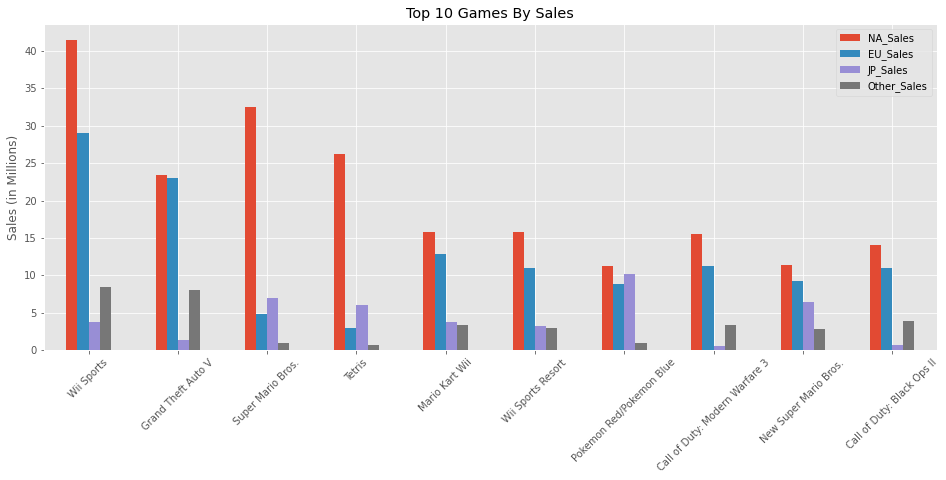

In [13]:
# Plot the data frame on a bar chart
top_10_games.plot.bar(
    title="Top 10 Games By Sales",
    figsize=(16, 6),
    ylabel="Sales (in Millions)",
    xlabel="",
    rot=45
)

#### Top 10 Publishers by Sales

In [14]:
top_10_publishers = data_cleaned[["Publisher", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].groupby("Publisher").sum()
top_10_publishers["sums"] = top_10_publishers.sum(1)
top_10_publishers = top_10_publishers.sort_values("sums", ascending=False)[:10].drop(columns=["sums"])

# Data Frame of the Top 10 Publishers by Sales
top_10_publishers

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Publisher,,,,
Nintendo,815.75,418.30,454.99,95.19
Electronic Arts,584.22,367.38,13.98,127.63
Activision,426.01,213.72,6.54,74.79
Sony Computer Entertainment,265.22,187.55,74.10,80.40
Ubisoft,252.81,163.03,7.33,50.16
Take-Two Interactive,220.47,117.95,5.83,55.20
THQ,208.60,94.60,5.01,32.11
Konami Digital Entertainment,88.91,68.62,90.93,29.91
Sega,108.78,81.41,56.19,24.30


<AxesSubplot:title={'center':'Top 10 Publishers by Sales'}, xlabel='Publisher', ylabel='Sales (in Millions)'>

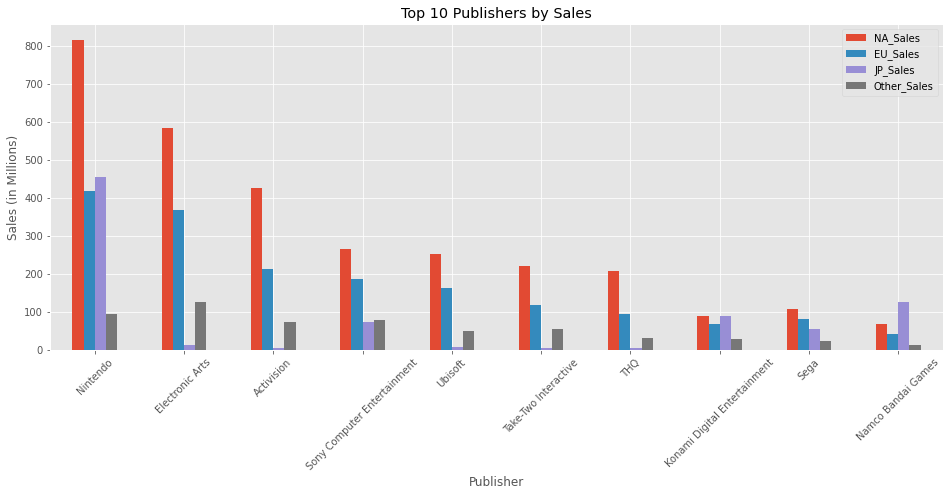

In [15]:
# Plot the data fram on a bar graph
top_10_publishers.plot.bar(
    title="Top 10 Publishers by Sales",
    ylabel="Sales (in Millions)",
    rot=45,
    figsize=(16,6)
)

#### Top 3 Publishers by Sales

In [16]:
# Create a MultiIndex Data Frame for the top 3 publishers and year
top_3_publishers = ["Nintendo", "Electronic Arts", "Activision"]
by_publisher = data_cleaned.loc[:, ["Publisher", "Year", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
by_publisher = by_publisher.groupby(["Publisher", "Year"]).agg({
    "NA_Sales": sum,
    "EU_Sales": sum,
    "JP_Sales": sum,
    "Other_Sales":sum
})
by_publisher = by_publisher.loc[["Nintendo", "Electronic Arts", "Activision"], :].sort_index()

# Top 3 Publishers and Year Indexed  Data Frame
by_publisher

NA_Sales  EU_Sales  JP_Sales  Other_Sales
Publisher  Year                                           
Activision 1980      2.82      0.18      0.00         0.03
           1981      7.95      0.46      0.00         0.08
           1982      1.75      0.11      0.00         0.03
           1983      1.81      0.11      0.00         0.02
           1984      0.26      0.01      0.00         0.00
...                   ...       ...       ...          ...
Nintendo   2012     20.84     13.97     18.56         3.13
           2013     19.00     16.21     14.39         3.18
           2014     18.01     11.37     16.12         3.17
           2015      9.25      7.49      8.57         1.77
           2016      1.16      0.93      1.17         0.20

[90 rows x 4 columns]

Text(0, 0.5, 'Sales (in Millions)')

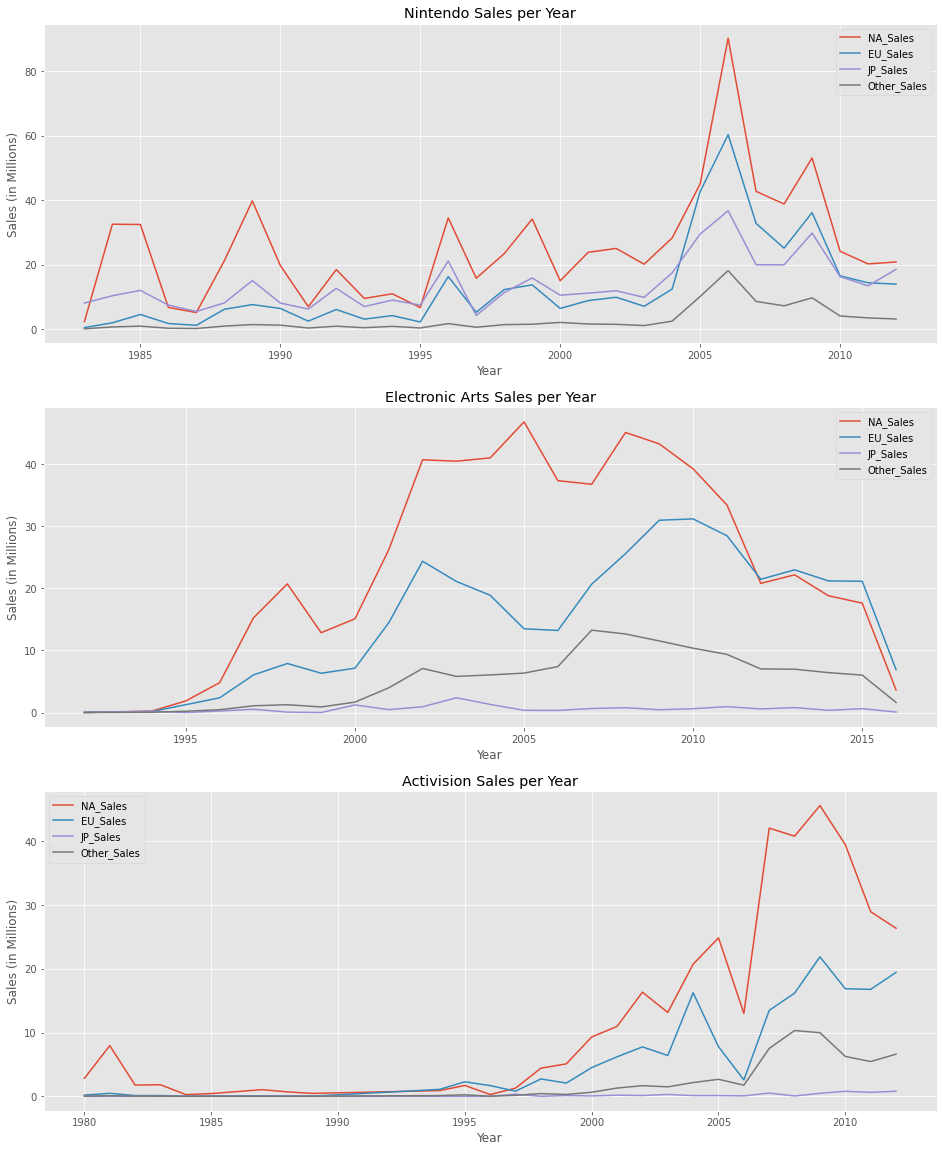

In [17]:
fig, (nintendo_sales, ea_sales, activision_sales) = plt.subplots(nrows= 3, ncols=1, figsize=(16, 20))

# Nintendo Sales Data
nintendo_sales.plot(by_publisher.loc[("Nintendo", 1980):("Nintendo", 2012)].loc["Nintendo"])
nintendo_sales.set_title("Nintendo Sales per Year")
nintendo_sales.legend(["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"])
nintendo_sales.set_xlabel("Year")
nintendo_sales.set_ylabel("Sales (in Millions)")

# EA Sales Data
ea_sales.plot(by_publisher.loc["Electronic Arts"])
ea_sales.set_title("Electronic Arts Sales per Year")
ea_sales.legend(["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"])
ea_sales.set_xlabel("Year")
ea_sales.set_ylabel("Sales (in Millions)")

# Activision Sales Data
activision_sales.plot(by_publisher.loc[("Activision", 1980):("Activision", 2012)].loc["Activision"])
activision_sales.set_title("Activision Sales per Year")
activision_sales.legend(["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"])
activision_sales.set_xlabel("Year")
activision_sales.set_ylabel("Sales (in Millions)")

### Top Games from Different Regions

#### North America

In [18]:
north_america_sales = data_cleaned.loc[:, ["Name", "NA_Sales"]].groupby("Name").sum().sort_values("NA_Sales", ascending=False)[:10]
north_america_sales

,NA_Sales
Name,
Wii Sports,41.49
Super Mario Bros.,32.48
Duck Hunt,26.93
Tetris,26.17
Grand Theft Auto V,23.46
Call of Duty: Black Ops,17.01
Super Mario World,15.99
Mario Kart Wii,15.85
Wii Sports Resort,15.75


<AxesSubplot:title={'center':'Top Selling Games in North America'}, xlabel='Game Titles', ylabel='Sales (in Millions)'>

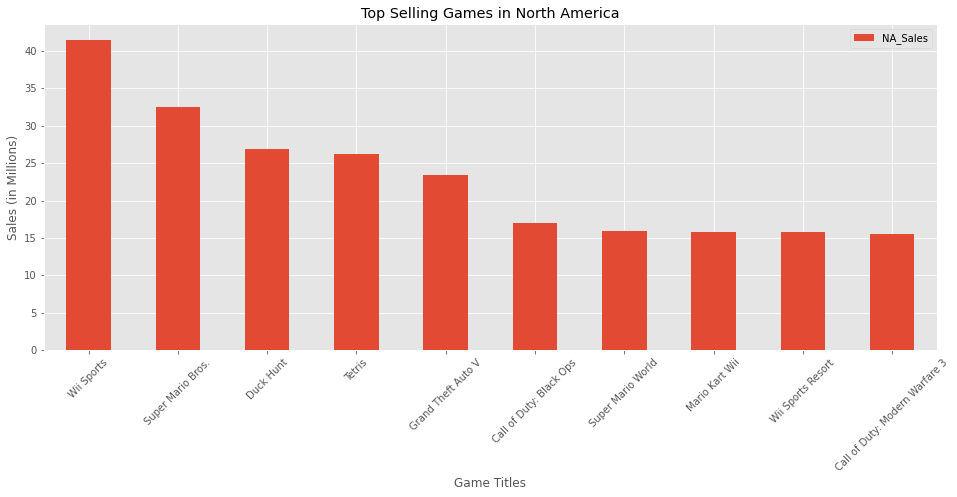

In [19]:
north_america_sales.plot.bar(
    title="Top Selling Games in North America",
    xlabel="Game Titles",
    ylabel="Sales (in Millions)",
    figsize=(16, 6),
    rot=45
)

<AxesSubplot:title={'center':'Top Selling Games in North America'}>

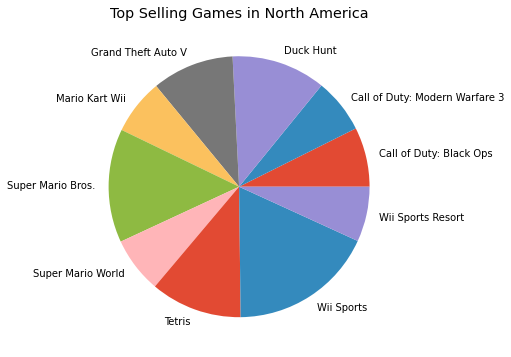

In [20]:
north_america_sales.loc[:, "NA_Sales"].sort_index().plot(
    kind="pie",
    title="Top Selling Games in North America",
    xlabel="Game Titles",
    ylabel="",
    figsize=(16, 6)
)

In [21]:
eu_sales = data_cleaned.loc[:, ["Name", "EU_Sales"]].groupby("Name").sum().sort_values("EU_Sales", ascending=False)[:10]
eu_sales

,EU_Sales
Name,
Wii Sports,29.02
Grand Theft Auto V,23.04
Mario Kart Wii,12.88
FIFA 15,12.40
Call of Duty: Modern Warfare 3,11.29
FIFA 16,11.29
FIFA 14,11.14
Call of Duty: Black Ops II,11.05
Wii Sports Resort,11.01


<AxesSubplot:title={'center':'Top Selling Games in the European Union'}, xlabel='Game Titles', ylabel='Sales (in Millions)'>

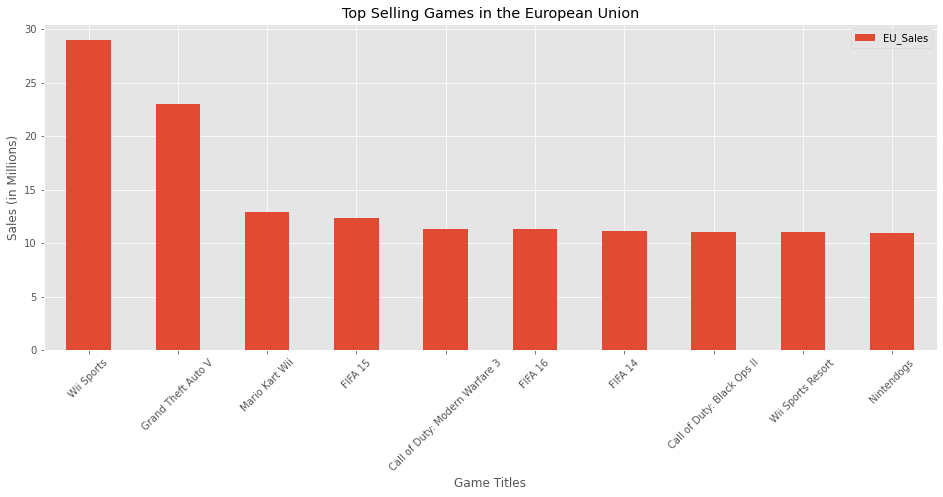

In [22]:
eu_sales.plot.bar(
    title="Top Selling Games in the European Union",
    xlabel="Game Titles",
    ylabel="Sales (in Millions)",
    figsize=(16, 6),
    rot=45
)

<AxesSubplot:title={'center':'Top Selling Games in the European Union'}>

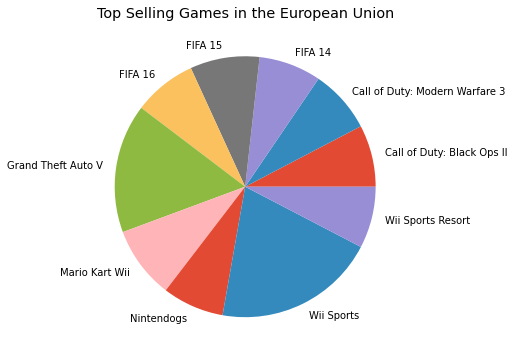

In [23]:
eu_sales.loc[:, "EU_Sales"].sort_index().plot(
    kind="pie",
    title="Top Selling Games in the European Union",
    xlabel="Game Titles",
    ylabel="",
    figsize=(16, 6)
)

In [24]:
jp_sales = data_cleaned.loc[:, ["Name", "JP_Sales"]].groupby("Name").sum().sort_values("JP_Sales", ascending=False)[:10]
jp_sales

,JP_Sales
Name,
Pokemon Red/Pokemon Blue,10.22
Pokemon Gold/Pokemon Silver,7.20
Super Mario Bros.,6.96
New Super Mario Bros.,6.50
Pokemon Diamond/Pokemon Pearl,6.04
Tetris,6.03
Pokemon Black/Pokemon White,5.65
Dragon Quest VII: Warriors of Eden,5.40
Pokemon Ruby/Pokemon Sapphire,5.38


<AxesSubplot:title={'center':'Top Selling Games in Japan'}, xlabel='Game Titles', ylabel='Sales (in Millions)'>

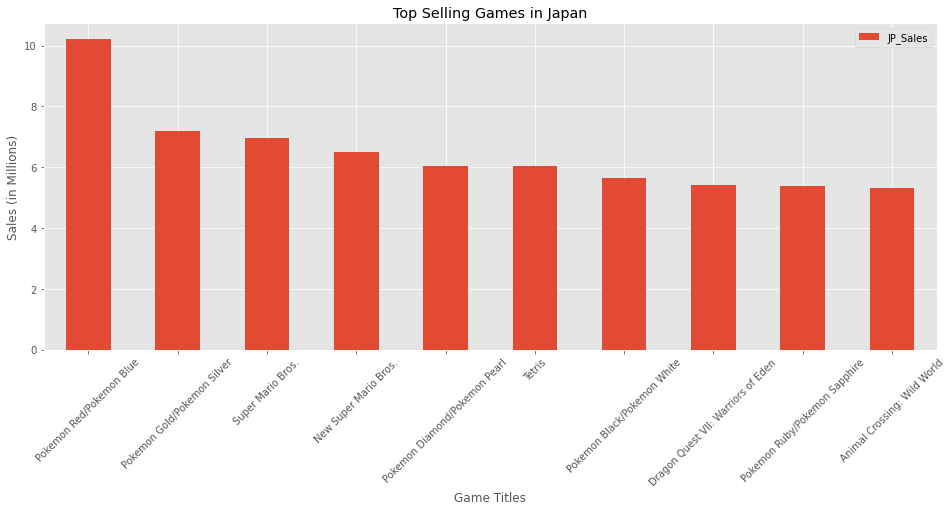

In [25]:
jp_sales.plot.bar(
    title="Top Selling Games in Japan",
    xlabel="Game Titles",
    ylabel="Sales (in Millions)",
    figsize=(16, 6),
    rot=45
)

<AxesSubplot:title={'center':'Top Selling Games in Japan'}>

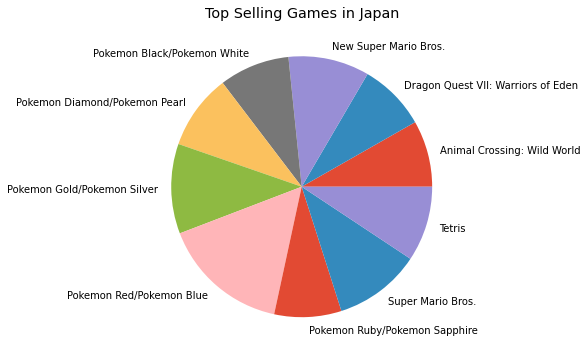

In [26]:
jp_sales.loc[:, "JP_Sales"].sort_index().plot(
    kind="pie",
    title="Top Selling Games in Japan",
    xlabel="Game Titles",
    ylabel="",
    figsize=(16, 6)
)

### North American Statistics

#### Top Selling Genres

In [27]:
na_genre_sales = data_cleaned.loc[:,["Genre", "NA_Sales"]].groupby("Genre").sum()
na_genre_sales

,NA_Sales
Genre,
Action,861.77
Adventure,101.93
Fighting,220.74
Misc,396.92
Platform,445.99
Puzzle,122.01
Racing,356.93
Role-Playing,326.50
Shooter,575.16


<AxesSubplot:title={'center':'Top Selling Genres (North America)'}, xlabel='Genre', ylabel='Sales (in Millions)'>

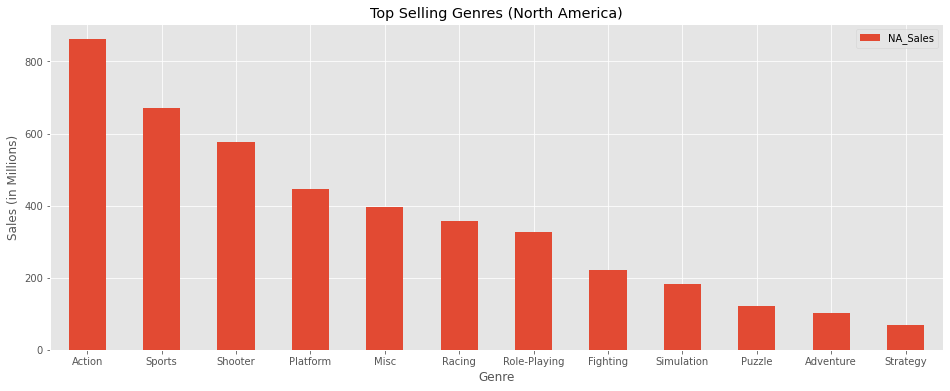

In [28]:
na_genre_sales.sort_values("NA_Sales", ascending=False).plot.bar(
    title="Top Selling Genres (North America)",
    ylabel="Sales (in Millions)",
    figsize=(16,6),
    rot="horizontal"
)

#### Most Games Sold by Platform

In [29]:
na_platform_sales = data_cleaned.loc[:, ["Platform", "NA_Sales"]].groupby("Platform").sum().sort_values("NA_Sales", ascending=False)[:10]
na_platform_sales

,NA_Sales
Platform,
X360,594.33
PS2,572.92
Wii,497.37
PS3,388.90
DS,388.53
PS,334.71
XB,182.06
GBA,178.43
N64,138.91


<AxesSubplot:title={'center':'Top Platform by Sales (North America)'}, xlabel='Platform', ylabel='Sales (in Million)'>

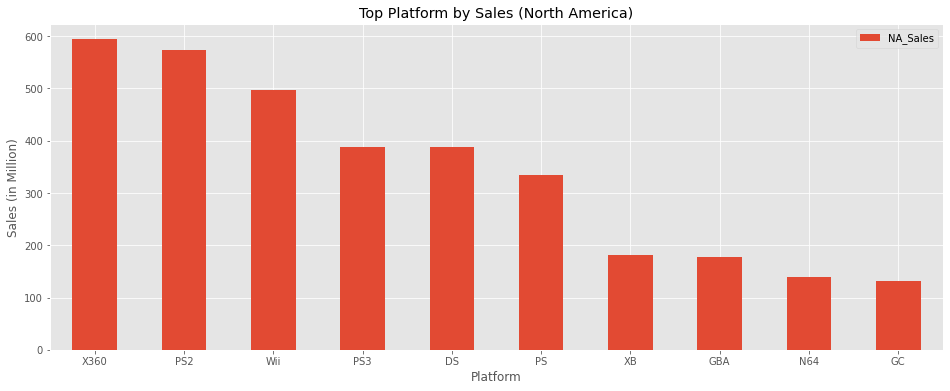

In [30]:
na_platform_sales.plot.bar(
    title="Top Platform by Sales (North America)",
    ylabel="Sales (in Million)",
    figsize=(16,6),
    rot="horizontal"
)

### European Union Statistics

#### Top Selling Genres

In [31]:
eu_genre_sales = data_cleaned.loc[:,["Genre", "EU_Sales"]].groupby("Genre").sum()
eu_genre_sales

,EU_Sales
Genre,
Action,516.48
Adventure,63.74
Fighting,100.00
Misc,211.77
Platform,200.65
Puzzle,50.52
Racing,236.31
Role-Playing,187.57
Shooter,310.45


<AxesSubplot:title={'center':'Top Selling Genres (European Union)'}, xlabel='Genre', ylabel='Sales (in Millions)'>

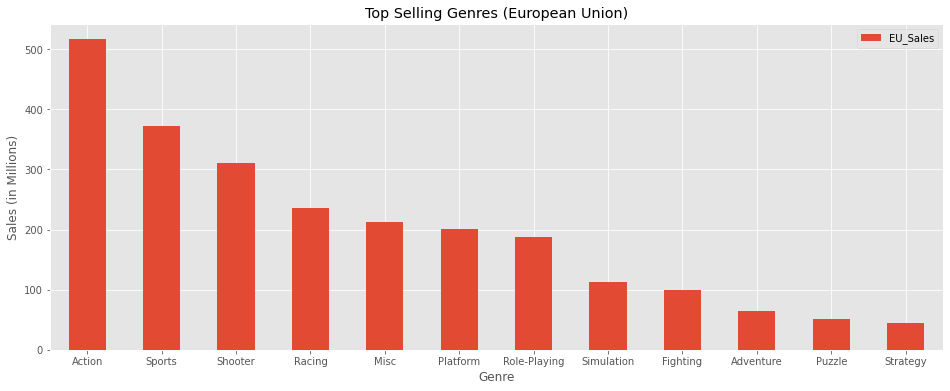

In [32]:
eu_genre_sales.sort_values("EU_Sales", ascending=False).plot.bar(
    title="Top Selling Genres (European Union)",
    ylabel="Sales (in Millions)",
    figsize=(16,6),
    rot="horizontal"
)

#### Most Games Sold by Platform

In [33]:
eu_platform_sales = data_cleaned.loc[:, ["Platform", "EU_Sales"]].groupby("Platform").sum().sort_values("EU_Sales", ascending=False)[:10]
eu_platform_sales

,EU_Sales
Platform,
PS3,340.47
PS2,332.63
X360,278.00
Wii,264.35
PS,212.38
DS,194.05
PC,137.35
PS4,123.70
GBA,72.49


<AxesSubplot:title={'center':'Top Platform by Sales (European Union)'}, xlabel='Platform', ylabel='Sales (in Million)'>

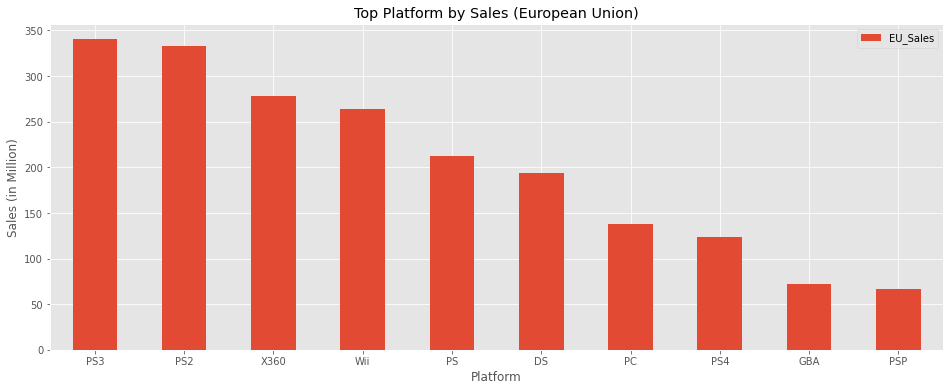

In [34]:
eu_platform_sales.plot.bar(
    title="Top Platform by Sales (European Union)",
    ylabel="Sales (in Million)",
    figsize=(16,6),
    rot="horizontal"
)

### Japan Statistics

#### Top Selling Genres

In [35]:
jp_genre_sales = data_cleaned.loc[:,["Genre", "JP_Sales"]].groupby("Genre").sum()
jp_genre_sales

,JP_Sales
Genre,
Action,158.65
Adventure,51.99
Fighting,87.15
Misc,106.67
Platform,130.65
Puzzle,56.68
Racing,56.61
Role-Playing,350.29
Shooter,38.18


<AxesSubplot:title={'center':'Top Selling Genres (Japan)'}, xlabel='Genre', ylabel='Sales (in Millions)'>

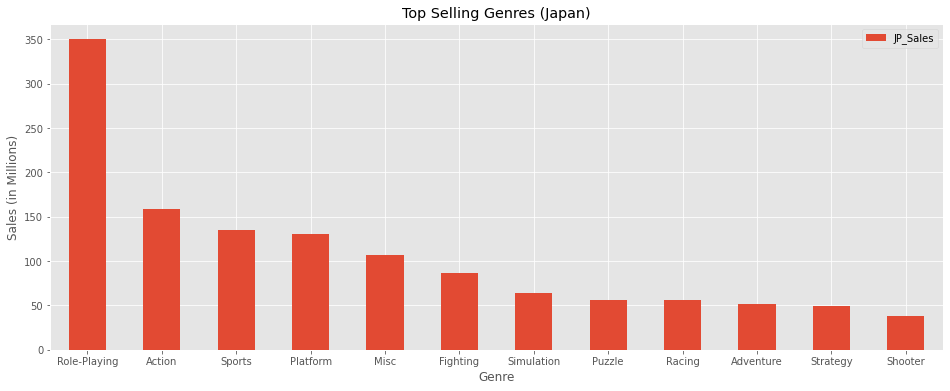

In [36]:
jp_genre_sales.sort_values("JP_Sales", ascending=False).plot.bar(
    title="Top Selling Genres (Japan)",
    ylabel="Sales (in Millions)",
    figsize=(16,6),
    rot="horizontal"
)

In [37]:
jp_platform_sales = data_cleaned.loc[:, ["Platform", "JP_Sales"]].groupby("Platform").sum().sort_values("JP_Sales", ascending=False)[:10]
jp_platform_sales

,JP_Sales
Platform,
DS,175.02
PS,139.78
PS2,137.54
SNES,116.55
NES,98.65
3DS,97.30
GB,85.12
PS3,79.21
PSP,75.89


<AxesSubplot:title={'center':'Top Platform by Sales (Japan)'}, xlabel='Platform', ylabel='Sales (in Million)'>

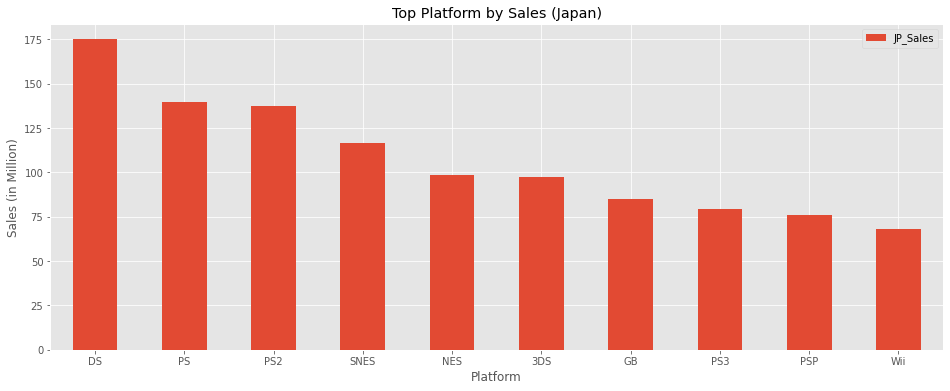

In [38]:
jp_platform_sales.plot.bar(
    title="Top Platform by Sales (Japan)",
    ylabel="Sales (in Million)",
    figsize=(16,6),
    rot="horizontal"
)